In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [25]:
df = pd.read_csv('sentiment analysis.csv')

In [26]:
df.sample(10)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km?),Density (P/Km?)
2049,903cce2dcd,Whoooooo I`m gettin` extra hours today afte...,neutral,morning,0-20,Eritrea,3546421,101000.0,35
1769,d792349406,she lookd soo freaked out!!poor wee thing,negative,night,31-45,Spain,46754778,498800.0,94
68,d41fe360e4,"for...the...loss. dumbface ...him, not u. wh...",negative,night,31-45,Guatemala,17915568,107160.0,167
1497,61c907173c,There you go.,neutral,morning,46-60,Serbia,8737371,87460.0,100
2136,58c5bad2d3,My day on the computer is about to end. Dang. ...,negative,morning,46-60,Qatar,2881053,11610.0,248
974,a92e8ab2a1,--Nothing,neutral,night,31-45,Zimbabwe,14862924,386850.0,38
563,b1cec36547,"working on mothers day slideshow, cake, card, ...",positive,night,70-100,Thailand,69799978,510890.0,137
1408,bd5f768159,is excited about tomorrow!!! but i gotta clean...,neutral,noon,60-70,Germany,83783942,348560.0,240
1188,c635a113c8,thanks! I`m totally bushed today though time ...,positive,morning,0-20,Congo (Congo-Brazzaville),5518087,342000.0,16
2191,a8e51d1a43,I miss having u as a roommate,negative,noon,60-70,Albania,2877797,27400.0,105


In [27]:
df.shape

(3534, 9)

In [28]:
df.describe()

,Population -2020,Land Area (Km?),Density (P/Km?)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 9 columns):
textID              3534 non-null object
text                3534 non-null object
sentiment           3534 non-null object
Time of Tweet       3534 non-null object
Age of User         3534 non-null object
Country             3534 non-null object
Population -2020    3534 non-null int64
Land Area (Km?)     3534 non-null float64
Density (P/Km?)     3534 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 248.6+ KB


In [30]:
df.describe(include=['O'])

,textID,text,sentiment,Time of Tweet,Age of User,Country
count,3534,3534,3534,3534,3534,3534
unique,3534,3534,3,3,6,195
top,04d3c2d056,I am going to die tomorrow night. should be ...,neutral,noon,31-45,Ethiopia
freq,1,1,1430,1178,590,20


In [31]:
df.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km?)', 'Density (P/Km?)'],
      dtype='object')

In [32]:
df.sentiment.value_counts()

neutral     1430
positive    1103
negative    1001
Name: sentiment, dtype: int64

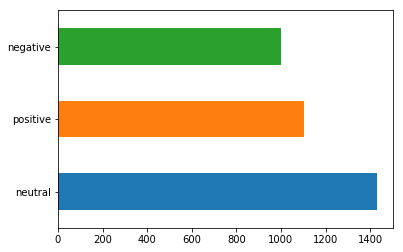

In [33]:
 df['sentiment'].value_counts().plot(kind = "barh")

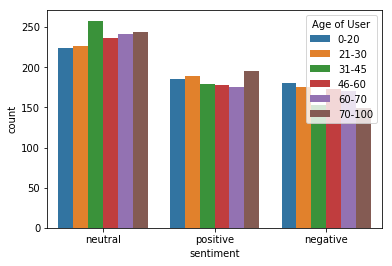

In [34]:
sns.countplot(df['sentiment'],hue=df['Age of User'])

In [35]:
df['Country'].value_counts()

Ethiopia                    20
Argentina                   20
Cambodia                    20
Cabo Verde                  20
Brazil                      20
Belgium                     20
Czechia (Czech Republic)    20
Estonia                     20
Australia                   20
Antigua and Barbuda         20
Gabon                       20
Bahrain                     20
C?e d'Ivoire                20
Benin                       20
Burundi                     20
Chile                       20
Bosnia and Herzegovina      20
Costa Rica                  20
Dominican Republic          20
Angola                      20
Cameroon                    20
Afghanistan                 20
Croatia                     20
Brunei                      20
Albania                     20
El Salvador                 20
Algeria                     20
China                       20
Azerbaijan                  20
Belize                      20
                            ..
United States of America    17
Zimbabwe

In [36]:
df.drop(labels= ['textID','Country', 'Population -2020','Land Area (Km?)','Density (P/Km?)','Time of Tweet'], axis=1)

,text,sentiment,Age of User
0,Last session of the day http://twitpic.com/67ezh,neutral,0-20
1,Shanghai is also really exciting (precisely -...,positive,21-30
2,"Recession hit Veronique Branquinho, she has to...",negative,31-45
3,happy bday!,positive,46-60
4,http://twitpic.com/4w75p - I like it!!,positive,60-70
5,that`s great!! weee!! visitors!,positive,70-100
6,I THINK EVERYONE HATES ME ON HERE lol,negative,0-20
7,"soooooo wish i could, but im in school and my...",negative,21-30
8,and within a short time of the last clue all ...,neutral,31-45
9,What did you get? My day is alright.. haven`...,neutral,46-60


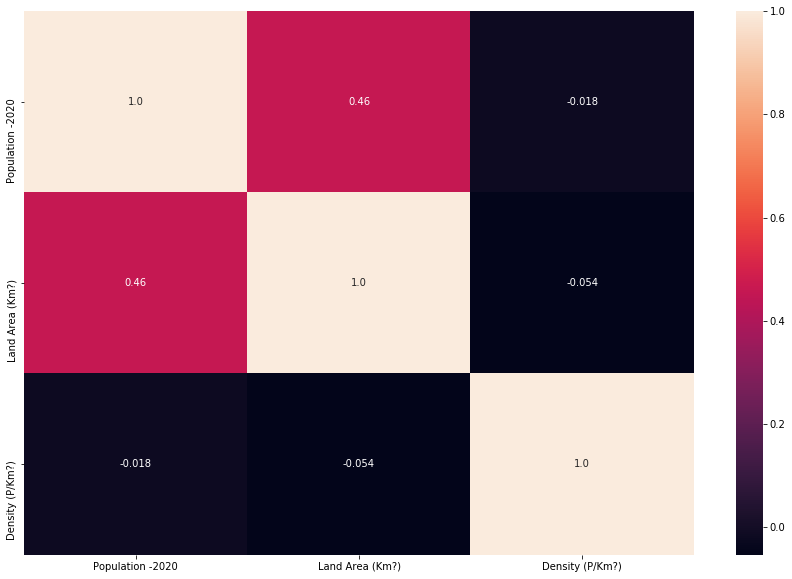

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2')

In [38]:
X = df['text']
y= df['sentiment']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=0)
print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (2827,)
Testing Data :  (707,)


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(2827, 6229)

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

X_test_cv = cv.transform(X_test)
predictions = lr.predict(X_test_cv)
predictions

array(['positive', 'positive', 'neutral', 'neutral', 'neutral',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'neutral',
       'positive', 'positive', 'negative', 'neutral', 'neutral',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'negative', 'neutral', 'positive', 'neutral', 'neutral',
       'positive', 'neutral', 'negative', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'positive', 'positive',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative',
       'negative', 'positive', 'negative', 'negative', 'neutral',
       'neutral', 'positive', 'neutral', 'positive', 'positive',
       'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'positive',
       'positive', 'positive', 'neutral', 'negative', 'neutral',
       'positive', 'neutral', 'neutral', 'neutral', 'negative', 'neutral',
       'positive', 'neutral', 'neutral', 'neutr

In [43]:
from sklearn.metrics import classification_report
y_test_cv = cv.transform(y_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

   negative       0.70      0.50      0.58       210
    neutral       0.58      0.71      0.64       281
   positive       0.69      0.69      0.69       216

avg / total       0.65      0.64      0.64       707



In [44]:
accuracy = (predictions == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.6393210749646393


In [45]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(X_train)
tfid_x_test = tfvect.transform(X_test)
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=50, n_iter=None,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)

In [48]:
def sentiment_analysis(text):
    input_data = [text]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [49]:
sentiment_analysis('hey peoples, dont you just hate being grounded haha, im just sat eating an apple and watching death note (some anime)')

['neutral']


In [50]:
sentiment_analysis(' well, not all. just stay away from those kinds and surround yourself with those who don`t. happy mother`s day to ur mom, treiz!')

['positive']


In [51]:
sentiment_analysis('Oh, **** me. I`ve just returned from the Supermarket Of Doom to find that I have nothing to drink here.')

['negative']
